In [83]:
from sklearn.datasets import make_classification
import numpy as np
# Generate a synthetic dataset for classification
X, y = make_classification(
    n_samples=100,            # Number of data points (samples) to generate
    n_features=2,             # Total number of features (columns) in the dataset
    n_informative=1,          # Number of informative features contributing to class separation
    n_redundant=0,            # Number of redundant features (linear combinations of informative features)
    n_classes=2,              # Number of output classes (binary classification in this case)
    n_clusters_per_class=1,   # Number of clusters generated per class
    random_state=41,          # Random seed for reproducibility
    hypercube=False,          # Whether features should be uniformly distributed in a hypercube (False = Gaussian distribution)
    class_sep= 20            # Controls the separation between classes; higher value means well-separated classes
)

In [84]:
import matplotlib.pyplot as plt

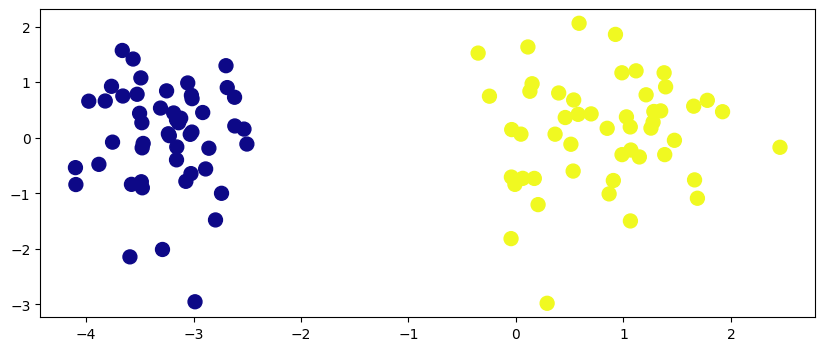

In [85]:
plt.figure(figsize=(10,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)

### Using the perceptron trick

In [86]:
import pandas as pd
import numpy as np

In [87]:
def perceptron(X, y):
     
     X  = np.insert(X, 0, 1, axis= 1)
     weights = np.ones(X.shape[1])
     lr = 0.1
     epoch = 1000
     
     for i in range(epoch):
          j = np.random.randint(0,100)
          y_hat = step(np.dot(X[j],weights))
          weights = weights + lr*(y[j]-y_hat)*X[j]

     return weights[0],weights[1:]

In [88]:
def step(z):
     return 1 if z>=0 else 0

In [89]:
intercept_,coef_ = perceptron(X,y)

In [90]:
print(intercept_)
print(coef_)

1.2000000000000002
[1.0580085  0.40381514]


In [91]:
#calculating slope and y-intercept for plotting
m = -(coef_[0]/coef_[1]) 
c = -(intercept_/coef_[1])

In [92]:
print(m)
print(c)

-2.6200317952788446
-2.9716568071029252


In [93]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

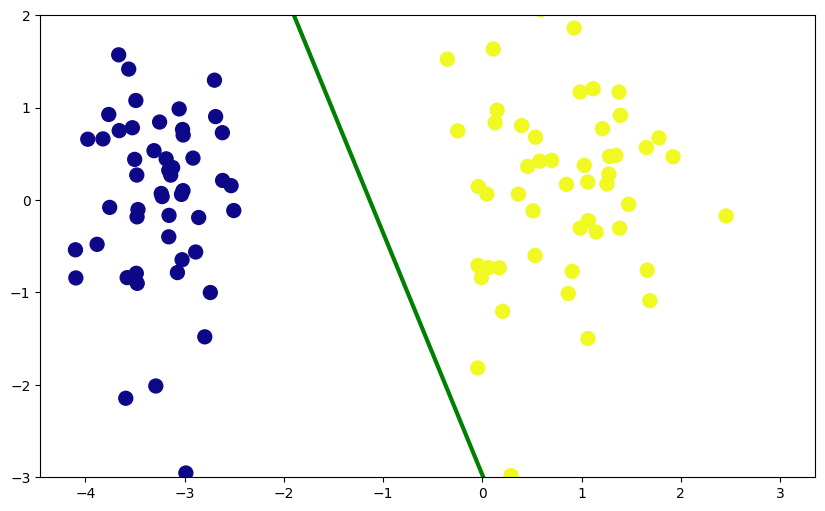

In [94]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='green', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)
plt.ylim(-3,2)

### Using sklearn

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lg = LogisticRegression()

In [97]:
lg.fit(X,y)

LogisticRegression()

In [98]:
lg.coef_

array([[2.36679363, 0.02300492]])

In [99]:
lg.intercept_

array([3.13571596])

In [100]:
m = -(lg.coef_[0][0]/lg.coef_[0][1])
c = -(lg.intercept_/lg.coef_[0][1])

In [101]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + c

(-3.0, 2.0)

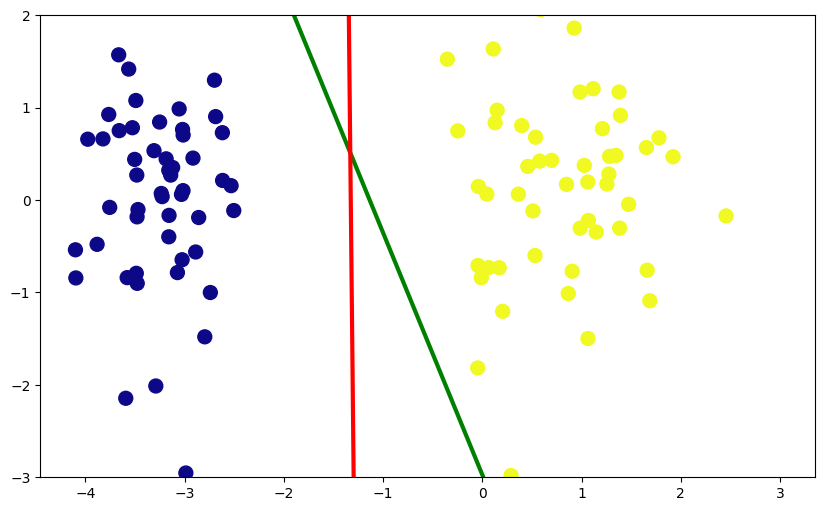

In [102]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)
plt.ylim(-3,2)

### using sigmoid function

In [106]:
def perceptron_sigmoid(X, y):
     
     X  = np.insert(X, 0, 1, axis= 1)
     weights = np.ones(X.shape[1])
     lr = 0.1
     epoch = 1000
     
     for i in range(epoch):
          j = np.random.randint(0,100)
          y_hat = sigmoid(np.dot(X[j],weights))
          weights = weights + lr*(y[j]-y_hat)*X[j]

     return weights[0],weights[1:]

In [107]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [109]:
intercept_, coef_ = perceptron_sigmoid(X, y)

In [110]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [111]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

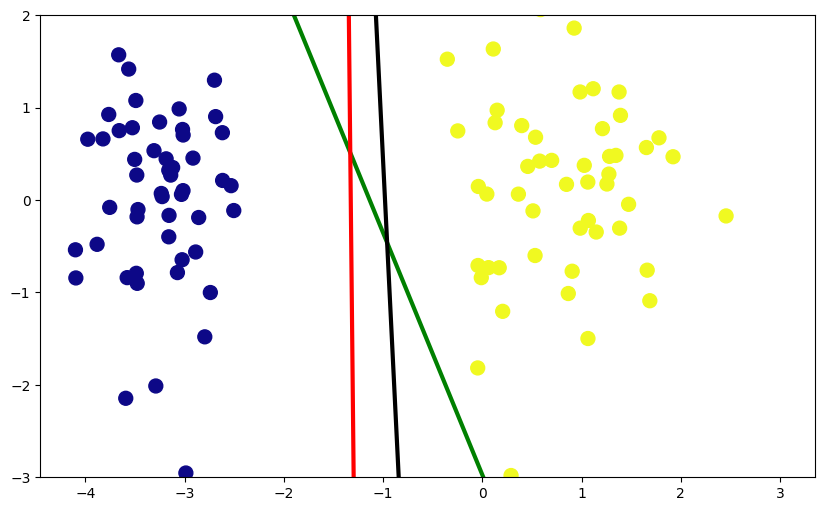

In [113]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)
plt.ylim(-3,2)